In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as mno
import seaborn as sns

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [7]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [4]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [3]:
data = data.drop(columns= 'CustomerID')

In [8]:
data.isnull().values.any()

False

In [4]:
# Make a copy of data and change datatype
train_data = data.copy()
for c in ['Gender']:
    train_data[c] = train_data[c].astype('category')
    train_data[c] = train_data[c].cat.codes

In [5]:
# Compare actual and encoded labels
print('column:', 'Gender')
print(data['Gender'].unique().tolist())
print(train_data['Gender'].unique().tolist(), '\n')

column: Gender
['Male', 'Female']
[1, 0] 



C:\Users\omarf\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


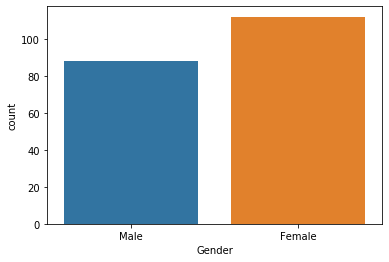

In [16]:
sns.countplot(data['Gender'])

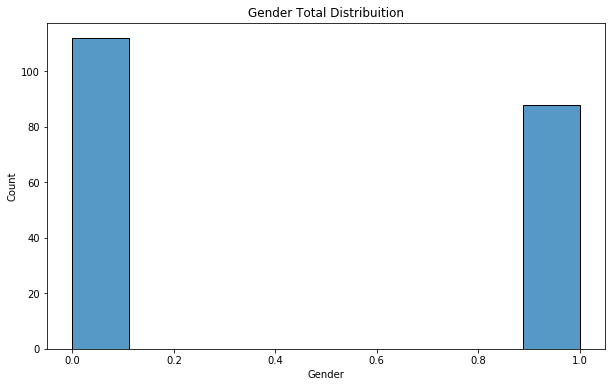

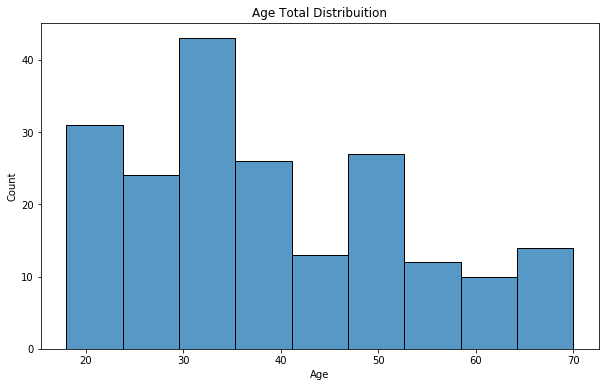

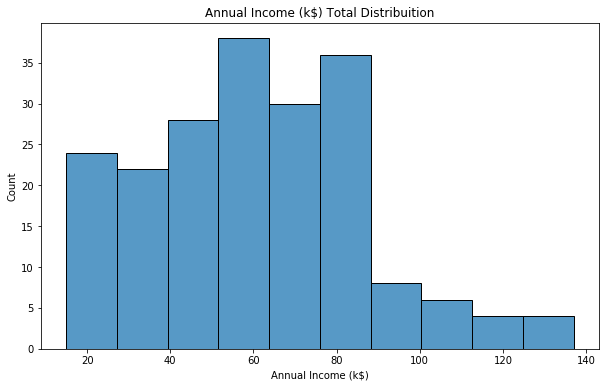

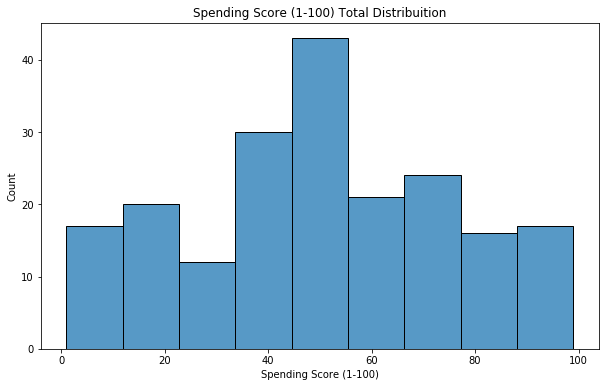

In [14]:
for var in data.columns:
        plt.figure(figsize = (10, 6))
        plt.title(var + ' Total Distribuition')
        sns.histplot(train_data[var])
        plt.show()

In [9]:
train_data.loc[train_data['Gender']==1, 'Annual Income (k$)']

0       15
1       15
8       19
10      19
14      20
      ... 
187    101
192    113
197    126
198    137
199    137
Name: Annual Income (k$), Length: 88, dtype: int64

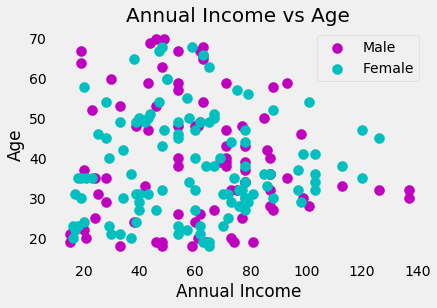

In [19]:
plt.scatter(train_data.loc[train_data['Gender']==1, 'Annual Income (k$)'],train_data.loc[train_data['Gender']==1, 'Age'], s = 100, c = 'm', label = 'Male')
plt.scatter(train_data.loc[train_data['Gender']==0, 'Annual Income (k$)'],train_data.loc[train_data['Gender']==0, 'Age'], s = 100, c = 'c', label = 'Female')

#plt.style.use('fivethirtyeight')
plt.figsize=(5, 5)
plt.title('Annual Income vs Age', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Age')
plt.legend()
plt.grid()
plt.show()

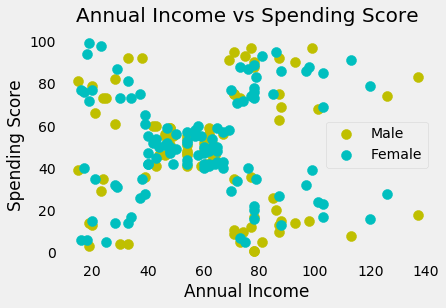

In [22]:
plt.scatter(train_data.loc[train_data['Gender']==1, 'Annual Income (k$)'],train_data.loc[train_data['Gender']==1, 'Spending Score (1-100)'], s = 100, c = 'y', label = 'Male')
plt.scatter(train_data.loc[train_data['Gender']==0, 'Annual Income (k$)'],train_data.loc[train_data['Gender']==0, 'Spending Score (1-100)'], s = 100, c = 'c', label = 'Female')

#plt.style.use('fivethirtyeight')
plt.figsize=(5, 5)
plt.title('Annual Income vs Spending Score', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

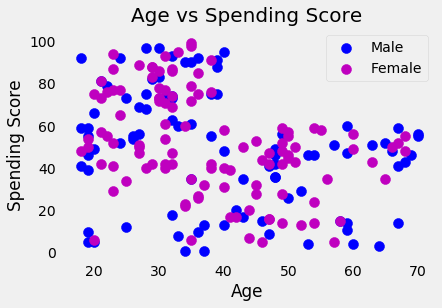

In [25]:
plt.scatter(train_data.loc[train_data['Gender']==1, 'Age'],train_data.loc[train_data['Gender']==1, 'Spending Score (1-100)'], s = 100, c = 'b', label = 'Male')
plt.scatter(train_data.loc[train_data['Gender']==0, 'Age'],train_data.loc[train_data['Gender']==0, 'Spending Score (1-100)'], s = 100, c = 'm', label = 'Female')

#plt.style.use('fivethirtyeight')
plt.figsize=(5, 5)
plt.title('Age vs Spending Score', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

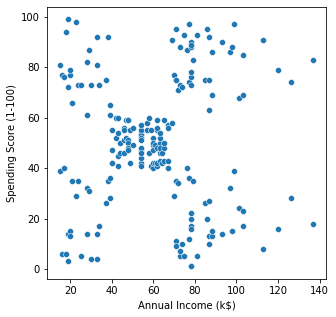

In [19]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(x=train_data['Annual Income (k$)'], y=train_data['Spending Score (1-100)'])

In [21]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


# K-Means

In [30]:
import os
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics
features = train_data.iloc[:, :]

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,15))

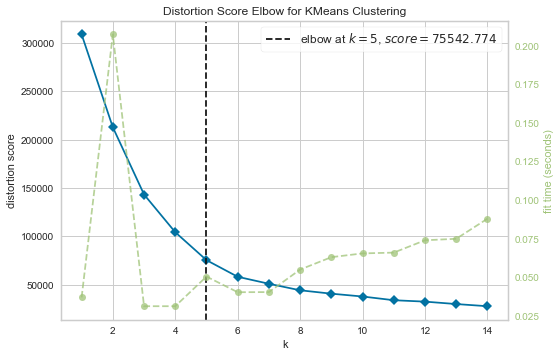

In [9]:


visualizer.fit(features)    # Fit the data to the visualizer
visualizer.poof()

In [31]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(features)
cluster_labels = kmeans.fit_predict(features)

kmeans.cluster_centers_

array([[ 0.41772152, 43.08860759, 55.29113924, 49.56962025],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.39130435, 25.52173913, 26.30434783, 78.56521739],
       [ 0.39130435, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.52777778, 40.66666667, 87.75      , 17.58333333]])

In [32]:
np.where(cluster_labels == 1)[0]

array([123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147,
       149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173,
       175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199],
      dtype=int64)

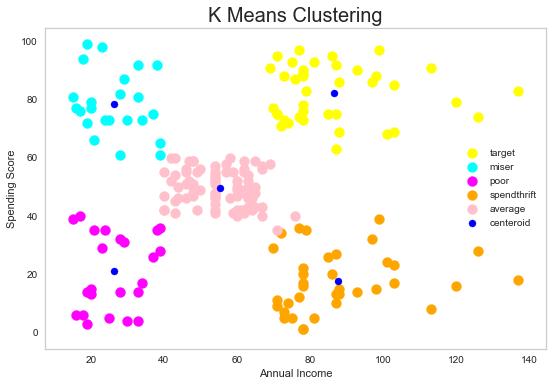

In [33]:

plt.scatter(features['Annual Income (k$)'][np.where(cluster_labels == 1)[0]], features['Spending Score (1-100)'][np.where(cluster_labels == 1)[0]], s = 100, c = 'yellow', label = 'target')
plt.scatter(features['Annual Income (k$)'][np.where(cluster_labels == 2)[0]], features['Spending Score (1-100)'][np.where(cluster_labels == 2)[0]], s = 100, c = 'cyan', label = 'miser')
plt.scatter(features['Annual Income (k$)'][np.where(cluster_labels == 3)[0]], features['Spending Score (1-100)'][np.where(cluster_labels == 3)[0]], s = 100, c = 'magenta', label = 'poor')
plt.scatter(features['Annual Income (k$)'][np.where(cluster_labels == 4)[0]], features['Spending Score (1-100)'][np.where(cluster_labels == 4)[0]], s = 100, c = 'orange', label = 'spendthrift')
plt.scatter(features['Annual Income (k$)'][np.where(cluster_labels == 0)[0]], features['Spending Score (1-100)'][np.where(cluster_labels == 0)[0]], s = 100, c = 'pink', label = 'average')
plt.scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:, 3], s = 50, c = 'blue' , label = 'centeroid')

#plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

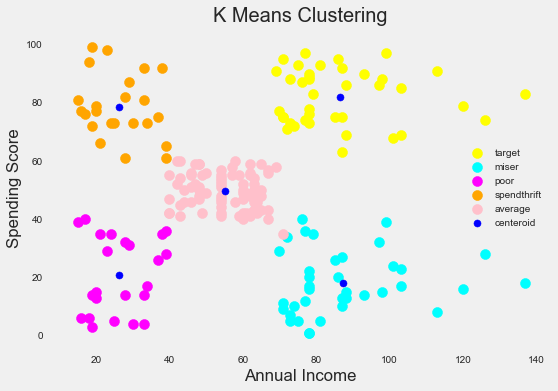

In [30]:

plt.scatter(features['Annual Income (k$)'][np.where(cluster_labels == 1)[0]], features['Spending Score (1-100)'][np.where(cluster_labels == 1)[0]], s = 100, c = 'yellow', label = 'target')
plt.scatter(features['Annual Income (k$)'][np.where(cluster_labels == 2)[0]], features['Spending Score (1-100)'][np.where(cluster_labels == 2)[0]], s = 100, c = 'cyan', label = 'miser')
plt.scatter(features['Annual Income (k$)'][np.where(cluster_labels == 3)[0]], features['Spending Score (1-100)'][np.where(cluster_labels == 3)[0]], s = 100, c = 'magenta', label = 'poor')
plt.scatter(features['Annual Income (k$)'][np.where(cluster_labels == 4)[0]], features['Spending Score (1-100)'][np.where(cluster_labels == 4)[0]], s = 100, c = 'orange', label = 'spendthrift')
plt.scatter(features['Annual Income (k$)'][np.where(cluster_labels == 0)[0]], features['Spending Score (1-100)'][np.where(cluster_labels == 0)[0]], s = 100, c = 'pink', label = 'average')
plt.scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:, 3], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

In [52]:
#silhouette score
print ('silhouette coefficient for the above clutering = ', metrics.silhouette_score(features, cluster_labels))

silhouette coefficient for the above clutering =  0.4440669204743008


# K-Mediods

In [27]:
from pyclustering.cluster.kmedoids import kmedoids

In [26]:
# Randomly pick 5 indexs from the original sample as the mediods
initial_medoids = [1, 40, 80, 130, 180]

# Create instance of K-Medoids algorithm with prepared centers.
kmedoids_instance = kmedoids(features.values.tolist(), initial_medoids)

# Run cluster analysis.
kmedoids_instance.process()

# predict function is not availble in the release branch yet.
# cluster_labels = kmedoids_instance.predict(features.values)

clusters = kmedoids_instance.get_clusters()

# Prepare cluster labels
cluster_labels_Med = np.zeros([data.shape[0]], dtype=int)
for x in np.nditer(np.asarray(clusters[1])):
   cluster_labels_Med[x] = 1
for x in np.nditer(np.asarray(clusters[2])):
   cluster_labels_Med[x] = 2
for x in np.nditer(np.asarray(clusters[3])):
   cluster_labels_Med[x] = 3
for x in np.nditer(np.asarray(clusters[4])):
   cluster_labels_Med[x] = 4

In [28]:
# Mediods found in above clustering, indexes are shouwn below.
a =kmedoids_instance.get_medoids()
a

[25, 36, 77, 175, 166]

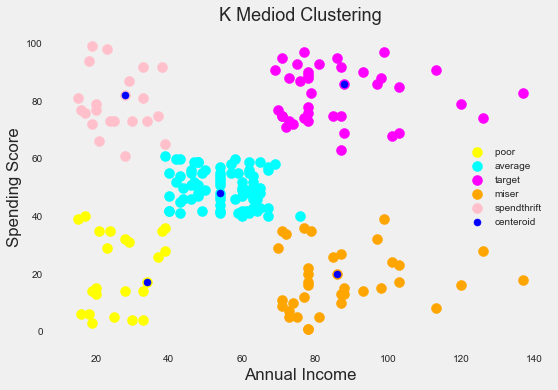

In [29]:
plt.scatter(features['Annual Income (k$)'][np.where(cluster_labels_Med == 1)[0]], features['Spending Score (1-100)'][np.where(cluster_labels_Med == 1)[0]], s = 100, c = 'yellow', label = 'poor ')
plt.scatter(features['Annual Income (k$)'][np.where(cluster_labels_Med == 2)[0]], features['Spending Score (1-100)'][np.where(cluster_labels_Med == 2)[0]], s = 100, c = 'cyan', label = 'average')
plt.scatter(features['Annual Income (k$)'][np.where(cluster_labels_Med == 3)[0]], features['Spending Score (1-100)'][np.where(cluster_labels_Med == 3)[0]], s = 100, c = 'magenta', label = 'target')
plt.scatter(features['Annual Income (k$)'][np.where(cluster_labels_Med == 4)[0]], features['Spending Score (1-100)'][np.where(cluster_labels_Med == 4)[0]], s = 100, c = 'orange', label = 'miser')
plt.scatter(features['Annual Income (k$)'][np.where(cluster_labels_Med == 0)[0]], features['Spending Score (1-100)'][np.where(cluster_labels_Med == 0)[0]], s = 100, c = 'pink', label = 'spendthrift')
plt.scatter(features['Annual Income (k$)'][a], features['Spending Score (1-100)'][a], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Mediod Clustering', fontsize = 18)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

In [68]:
#silhouette score for k-Mediods
print ('silhouette coefficient for the above clutering = ',  metrics.silhouette_score(features, cluster_labels_Med))

silhouette coefficient for the above clutering =  0.4438841244266416
